In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Iris dataset
df = pd.read_csv("datasets/Iris.csv")

In [3]:
# Drop unnecessary columns
df = df.drop(columns=["Id"])

In [4]:
# Take only features for clustering
X = df.drop(columns=["Species"])

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
inertia = []   # sum of squared distances to closest cluster center
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

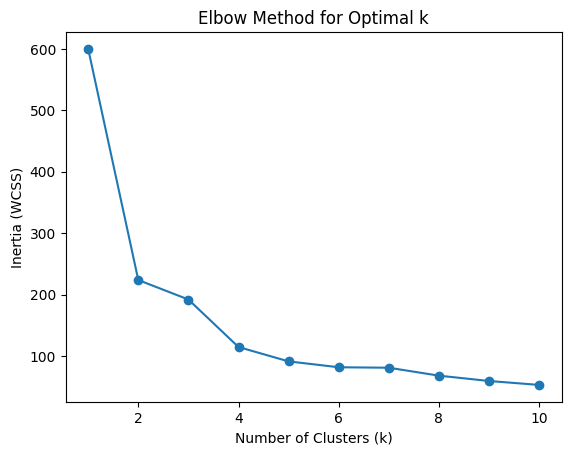

In [7]:
# Plot Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [8]:
# Train KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

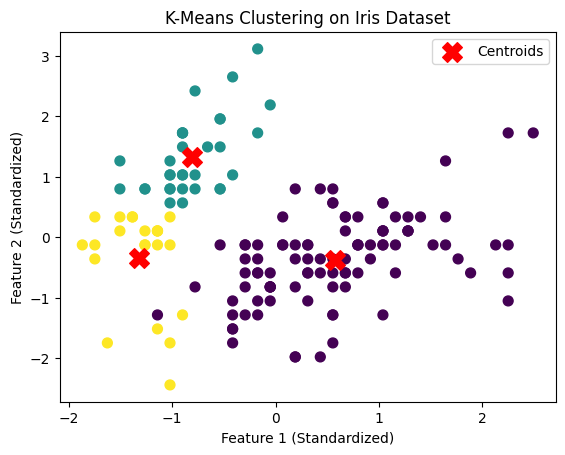

In [9]:
# Add cluster labels to dataset
df['Cluster'] = y_kmeans

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

In [10]:
# Crosstab to check mapping between clusters and species
print(pd.crosstab(df['Cluster'], df['Species']))

Species  Iris-setosa  Iris-versicolor  Iris-virginica
Cluster                                              
0                  0               46              50
1                 32                0               0
2                 18                4               0
